# Linear Regression
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/andrychowanda/COMP6577/blob/master/COMP6577-2.ipynb)

Import required packages

In [113]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sb
import wget
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


Load & profile the data

In [114]:
!wget https://raw.githubusercontent.com/andrychowanda/COMP6577/master/insurance.csv

--2021-12-12 17:28:58--  https://raw.githubusercontent.com/andrychowanda/COMP6577/master/insurance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37974 (37K) [text/plain]
Saving to: 'insurance.csv.2'

     0K .......... .......... .......... .......              100% 3,46M=0,01s

2021-12-12 17:28:59 (3,46 MB/s) - 'insurance.csv.2' saved [37974/37974]



In [115]:
data = pd.read_csv("insurance.csv")
print(data.dtypes)
print(data.isna().values.any())

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object
False


In [116]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB
None
               age          sex          bmi     children       smoker  \
count  1338.000000  1338.000000  1338.000000  1338.000000  1338.000000   
mean     39.207025     1.505232    30.663397     1.094918     0.204783   
std      14.049960     0.500160     6.098187     1.205493     0.403694   
min      18.000000     1.000000    15.960000     0.000000     0.000000   
25%      27.000000     1.000000    26.296250     0.000000     0.000000   
50%      39.000000     2.000000    30.40000

Select particular column, and visualise the data (histogram)

   age  sex     bmi  children  smoker  region      charges
0   19    1  27.900         0       1       0  16884.92400
1   18    2  33.770         1       0       2   1725.55230
2   28    2  33.000         3       0       2   4449.46200
3   33    2  22.705         0       0       1  21984.47061
4   32    2  28.880         0       0       1   3866.85520


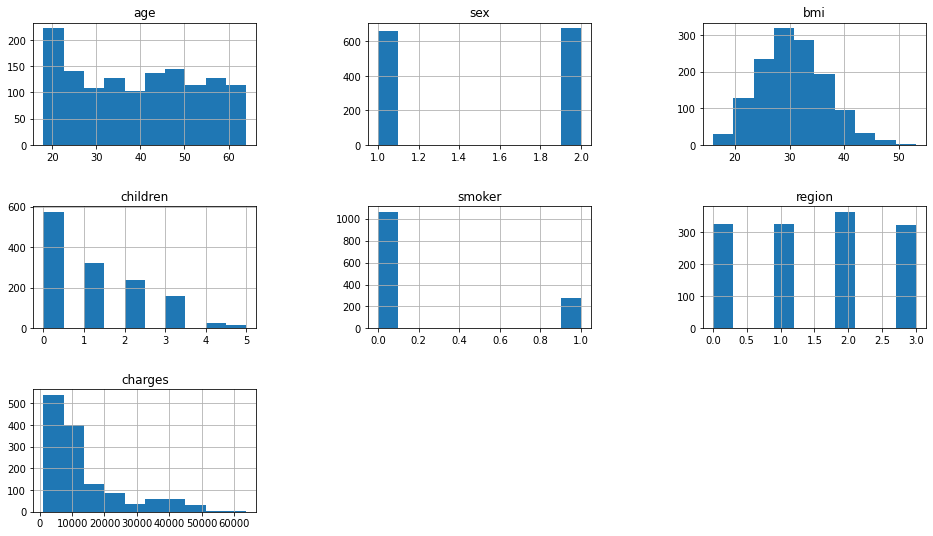

In [117]:
newData = data[["age","sex","bmi","children","smoker","region","charges"]]
print(newData.head())
newData.hist()
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

Visualise the data (Scatter)

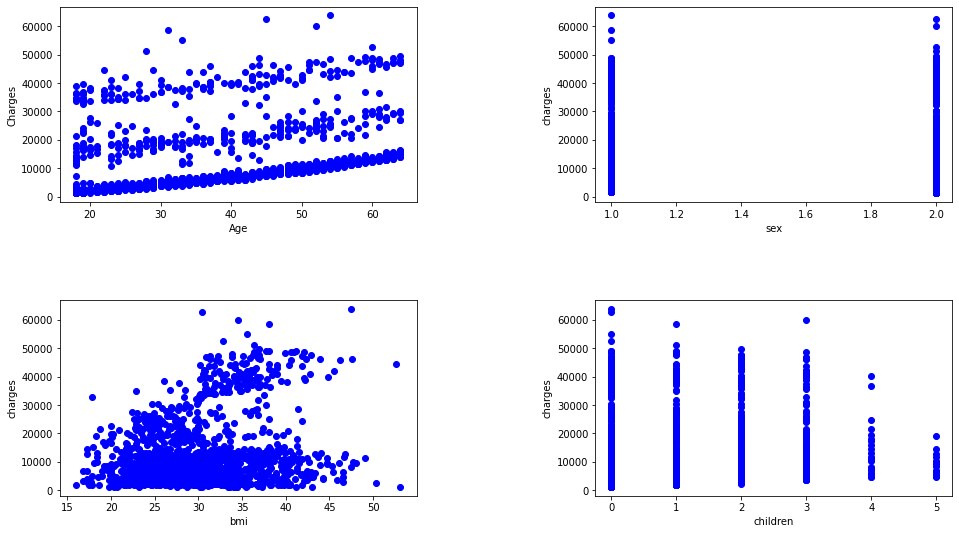

In [118]:
plt.subplot(221)
plt.scatter(newData["age"], newData["charges"], color="blue")
plt.xlabel("Age")
plt.ylabel("Charges")

plt.subplot(222)
plt.scatter(newData["sex"], newData["charges"], color="blue")
plt.xlabel("sex")
plt.ylabel("charges")

plt.subplot(223)
plt.scatter(newData["bmi"], newData["charges"], color="blue")
plt.xlabel("bmi")
plt.ylabel("charges")

plt.subplot(224)
plt.scatter(newData["children"], newData["charges"], color="blue")
plt.xlabel("children")
plt.ylabel("charges")


plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

Regression - Engine Size

In [120]:
train, test = train_test_split(newData, test_size=0.2)
regression = linear_model.LinearRegression()
regression.fit(train[["bmi"]], train[["charges"]])
print('Coefficients: ', regression.coef_)
print('Intercept: ',regression.intercept_)

Coefficients:  [[431.04165954]]
Intercept:  [459.24091437]


Visualise the regression to the plot

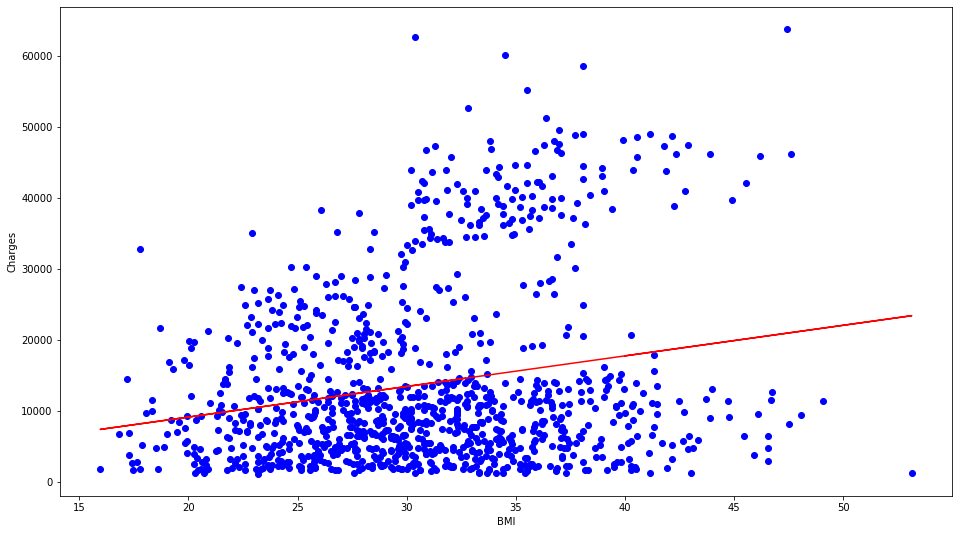

In [122]:
plt.scatter(train["bmi"], train["charges"],  color='blue')
plt.plot(train[["bmi"]], regression.coef_ * train[["bmi"]] + regression.intercept_, '-r')
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.rcParams["figure.figsize"] = [9,7]
plt.show()

Make the visualisation easier with Seaborn Package

C:\Users\steve\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


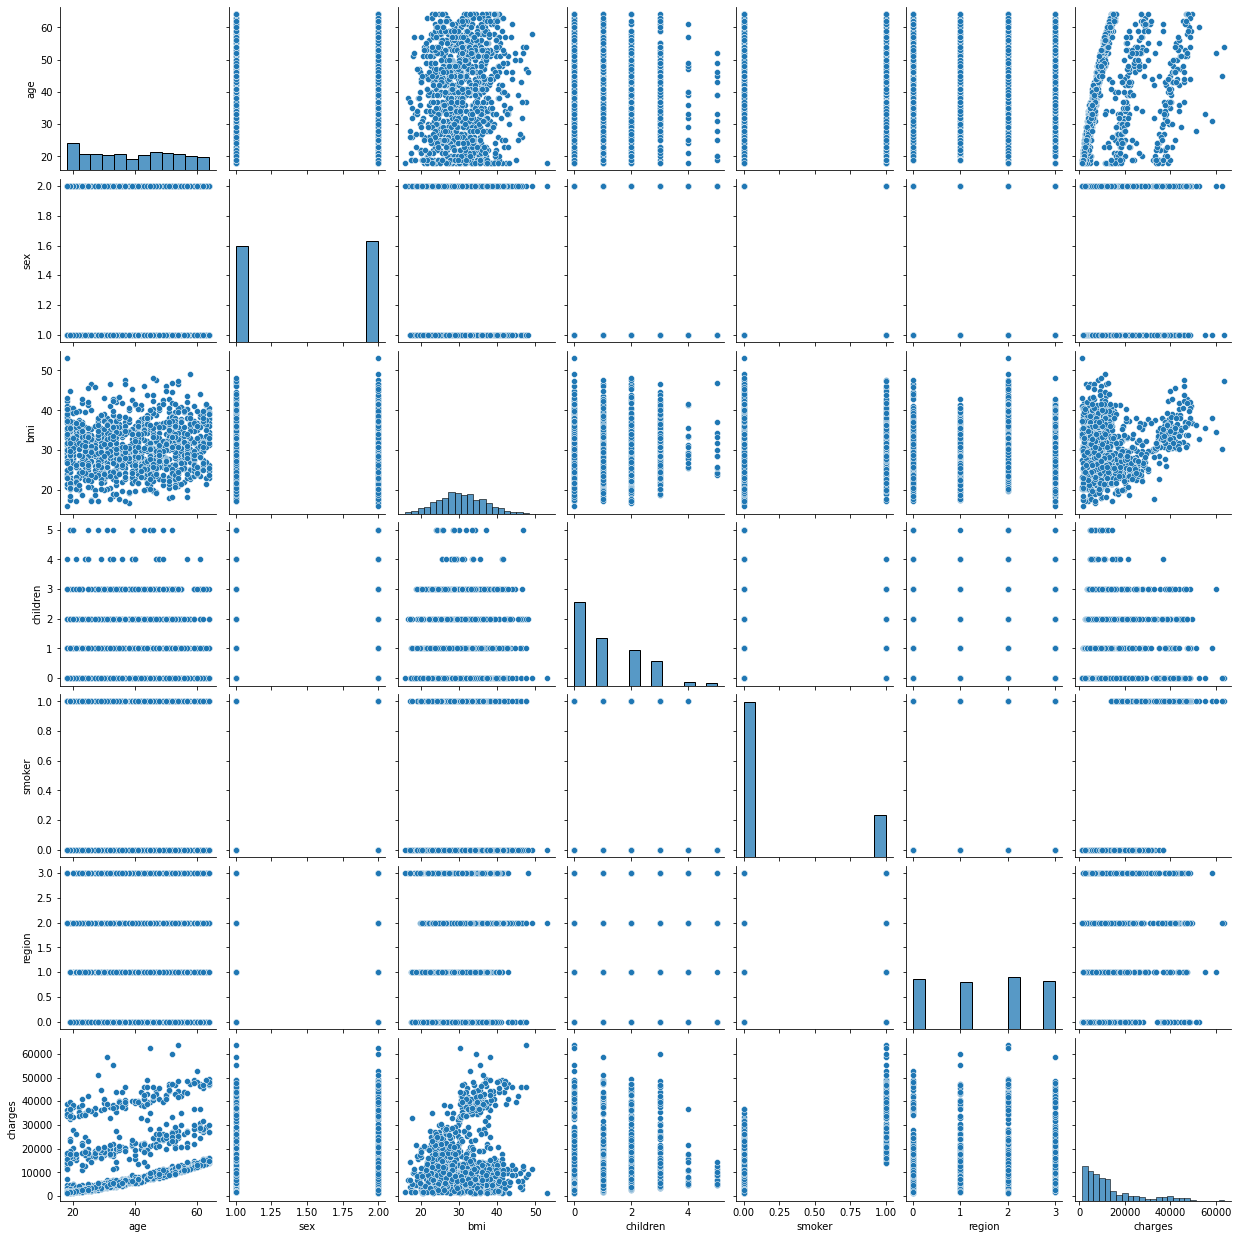

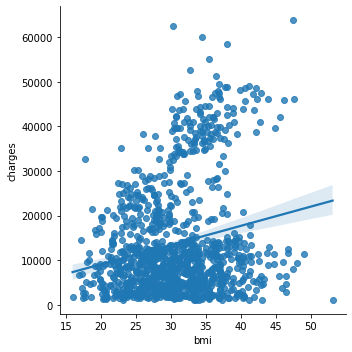

In [124]:
sb.pairplot(train)
sb.lmplot("bmi", "charges", data = train)
plt.show()

Predict new data & evaluate the model

In [126]:
prediction = regression.predict(test[["bmi"]])
for i in range(len(test)):
  print(test[["bmi"]].values[i], prediction[i])

print("MAE : ", mean_absolute_error(test[["charges"]], prediction))
print("MSE : ", mean_squared_error(test[["charges"]], prediction))
print("R2 : ", r2_score(test[["charges"]], prediction))


[30.8] [13735.32402805]
[33.] [14683.61567902]
[35.09] [15584.49274745]
[44.745] [19746.19997026]
[31.4] [13993.94902377]
[33.7] [14985.3448407]
[37.29] [16532.78439843]
[34.295] [15241.81462812]
[24.7] [11105.96990488]
[25.46] [11433.56156613]
[32.395] [14422.835475]
[38.83] [17196.58855411]
[36.195] [16060.79378124]
[41.91] [18524.19686548]
[50.38] [22175.11972174]
[30.59] [13644.80527954]
[34.58] [15364.66150109]
[23.37] [10532.6844977]
[32.78] [14588.78651392]
[27.1] [12140.46988777]
[34.77] [15446.5594164]
[39.82] [17623.31979705]
[28.595] [12784.87716877]
[25.175] [11310.71469316]
[23.7] [10674.92824535]
[25.4] [11407.69906656]
[28.31] [12662.0302958]
[31.6] [14080.15735567]
[34.43] [15300.00525216]
[23.75] [10696.48032832]
[38.83] [17196.58855411]
[25.46] [11433.56156613]
[22.99] [10368.88866708]
[21.47] [9713.70534458]
[32.45] [14446.54276628]
[32.205] [14340.93755969]
[22.135] [10000.34804817]
[38.39] [17006.93022392]
[19.8] [8993.86577316]
[26.7] [11968.05322395]
[23.1] [1041